In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
# Select a linear model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import RidgeCV

In [ ]:
np.random.seed(42)

# Prepare for the data model In this example,
#  y = 1.0 x1 + 5*x3+7.8*x7 + e

In [3]:
mu, sigma = 0, 0.5 # mean and standard deviation
N = 1200 # N: number of samples
d = 800 # d: the input dim
X = np.random.normal(mu, sigma, [N, d])
eps = np.random.normal(0, 0.5, [N, 1])
beta = np.zeros([d, 1], float)
beta[np.array([1, 3, 7]),0]  =  [1.0, 5.0, 7.8]
y = np.dot(X, beta) + eps

In [4]:
y_actual = np.dot(X, beta)

In [5]:
# Split the dataset into the training set and testing set

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

y_actual_train = np.dot( X_train, beta) 
y_actual_test =  np.dot(X_test, beta)

y_pred = model.predict(X_test)


R score on test data :  0.923246348332764
rmse on test data :  1.3008227518948794


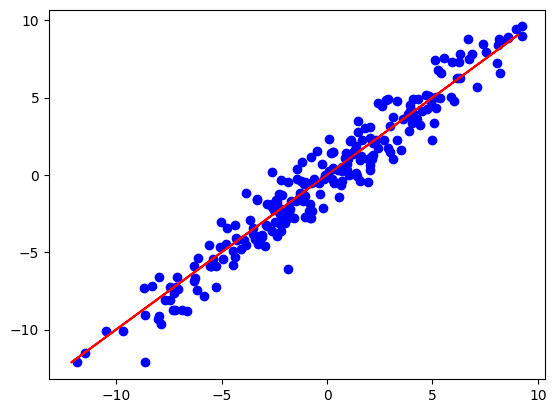

In [12]:
print("R score on test data : " , r2_score(y_pred,y_test))
print("rmse on test data : ", np.sqrt(mean_squared_error(y_test, y_pred)))

# Accuracy can't be used for Regression
#print(accuracy_score(y_pred,y_test)) 

plt.scatter(y_actual_test, y_pred, color='b')
plt.plot(y_test, y_test, color='r')
()

In [15]:
# LASSO
lasso=LassoCV(cv=20)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
print("R score on test data : " , r2_score(y_pred_lasso,y_test))
print("rmse on test data : ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))



C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R score on test data :  0.9857488583591426
rmse on test data :  0.5221714843252867


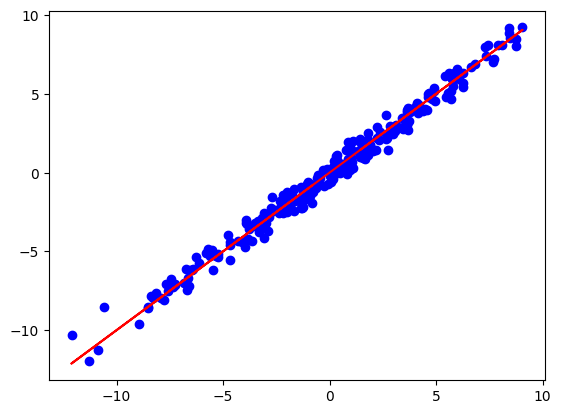

In [16]:
plt.scatter(y_test, y_pred_lasso, color='b')
plt.plot(y_test, y_test, color='r')

In [18]:
ridge=RidgeCV(20)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
print("R score on test data : " , r2_score(y_pred_ridge,y_test))
print("rmse on test data : ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R score on test data :  0.8317597147144373
rmse on test data :  1.5502327999634686
